In [6]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = '../data/monthly.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and columns
df.head()

,fips,name,state_fips,date,filings_count,percent_of_historical_average,judgments_count,defaults_count,defaults_rate,avg_judgments_count,avg_defaults_count,avg_defaults_rate,filings_latest_date,filings_latest,cases_judgment,cases_default
0,2,Alaska,2,2016-01-01 12:00:00,238,99.06,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,206,NaN,NaN
1,2,Alaska,2,2016-02-01 12:00:00,217,103.58,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,206,NaN,NaN
2,2,Alaska,2,2016-03-01 12:00:00,201,93.93,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,206,NaN,NaN
3,2,Alaska,2,2016-04-01 12:00:00,216,102.13,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,206,NaN,NaN
4,2,Alaska,2,2016-05-01 12:00:00,237,102.38,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,206,NaN,NaN


In [7]:
# Group the data by the 'name' column and sum up the 'filings_count'
grouped_by_state = df.groupby('name')['filings_count'].sum().reset_index()

# Sort the data by 'filings_count' in descending order for better visibility
grouped_by_state = grouped_by_state.sort_values('filings_count', ascending=False)

grouped_by_state.head(10)

,name,filings_count
887,Virginia,927856
848,Texas,799518
596,New York,777627
660,Pennsylvania,722528
33,Arizona,510184
404,Indiana,493355
292,Florida,477973
519,Maricopa,436783
362,Harris,421049
621,Oklahoma,415375


In [8]:
# Select the top 15 by state 
top_15 = grouped_by_state.head(15)

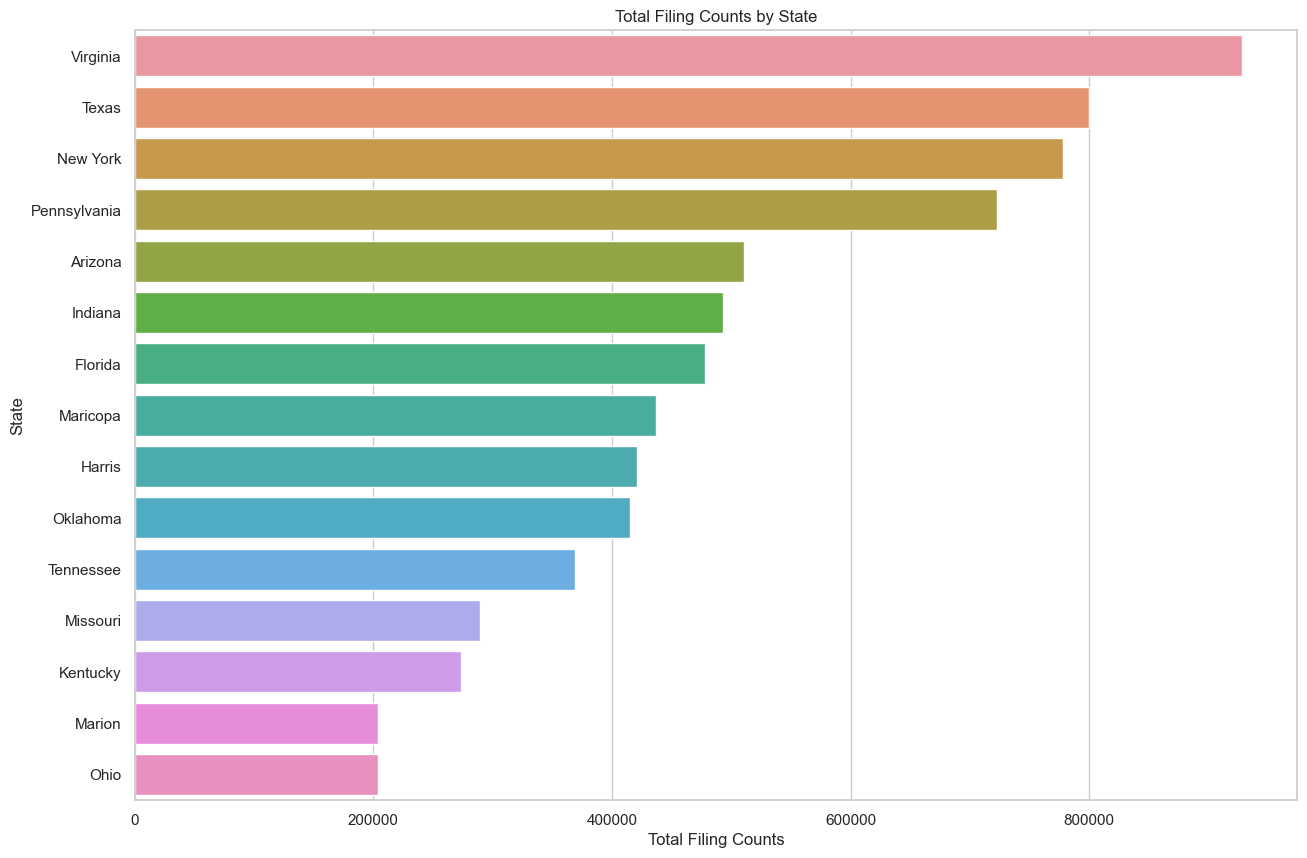

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Create the bar plot
sns.barplot(x='filings_count', y='name', data=top_15)

# Add title and labels
plt.title('Total Filing Counts by State')
plt.xlabel('Total Filing Counts')
plt.ylabel('State')

# Show the plot
plt.show()

In [12]:
# Subset the dataset to the state of Tennessee only 
tn_df = df[df['name'] == 'Tennessee']

# Extract month from the date variable. Summarize by month 

tn_df['month'] = pd.DatetimeIndex(tn_df['date']).month

tn_df.head()

/var/folders/s4/dmrwtmjx5r74xnn6rjg8d91r0000gn/T/ipykernel_23461/2785615137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_df['month'] = pd.DatetimeIndex(tn_df['date']).month


,fips,name,state_fips,date,filings_count,percent_of_historical_average,judgments_count,defaults_count,defaults_rate,avg_judgments_count,avg_defaults_count,avg_defaults_rate,filings_latest_date,filings_latest,cases_judgment,cases_default,month
79119,47,Tennessee,47,2016-01-01 12:00:00,4350,87.52,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,5453,NaN,NaN,1
79120,47,Tennessee,47,2016-02-01 12:00:00,4220,98.15,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,5453,NaN,NaN,2
79121,47,Tennessee,47,2016-03-01 12:00:00,3523,95.49,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,5453,NaN,NaN,3
79122,47,Tennessee,47,2016-04-01 12:00:00,3817,96.34,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,5453,NaN,NaN,4
79123,47,Tennessee,47,2016-05-01 12:00:00,4624,97.51,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01 12:00:00,5453,NaN,NaN,5


In [13]:
# Summarize by month 
tn_df = tn_df.groupby('month')['filings_count'].sum().reset_index()
tn_df.head()

,month,filings_count
0,1,37605
1,2,32808
2,3,29858
3,4,27190
4,5,32472
